https://open-geodaten-konstanz-gis.opendata.arcgis.com/

https://www.konstanz.de/geoportal


https://offenedaten-konstanz.de/dataset/kleinr-umige-gliederung

https://offenedaten-konstanz.de/dataset/flaechennutzung


https://open-geodaten-konstanz-gis.opendata.arcgis.com/datasets/0237161745a34dabb4741e463489dbca/explore?layer=148&location=47.708268%2C9.151881%2C11.60&showTable=true


https://open-geodaten-konstanz-gis.opendata.arcgis.com/datasets/konstanz-gis::kn-baumkataster/explore?location=47.667831%2C9.211297%2C16.50


https://smart-green-city-konstanz.de/group/5/content/66
https://konstanz-gis.maps.arcgis.com/apps/webappviewer3d/index.html?id=97137bf3da6148e18bb9e171268ff287

In [14]:
import pandas as pd
mess_meta = pd.read_csv("messstationen_meta.csv", sep=";")
mess_meta

,name,Geogr.Laenge,Geogr.Breite
0,Döbele,9.168898,47.658239
1,Europapark,9.162823,47.667215
2,Fähre Staad,9.209338,47.682119
3,Friedrichstrasse,9.183755,47.675575
4,Herose-Park,9.174574,47.669055
5,Hörnle,9.214489,47.667024
6,Mainaustrasse,9.187752,47.670510
7,Marktstätte,9.177239,47.660473
8,Riedstrasse,9.147058,47.681976
9,Stadtgarten,9.178891,47.662419


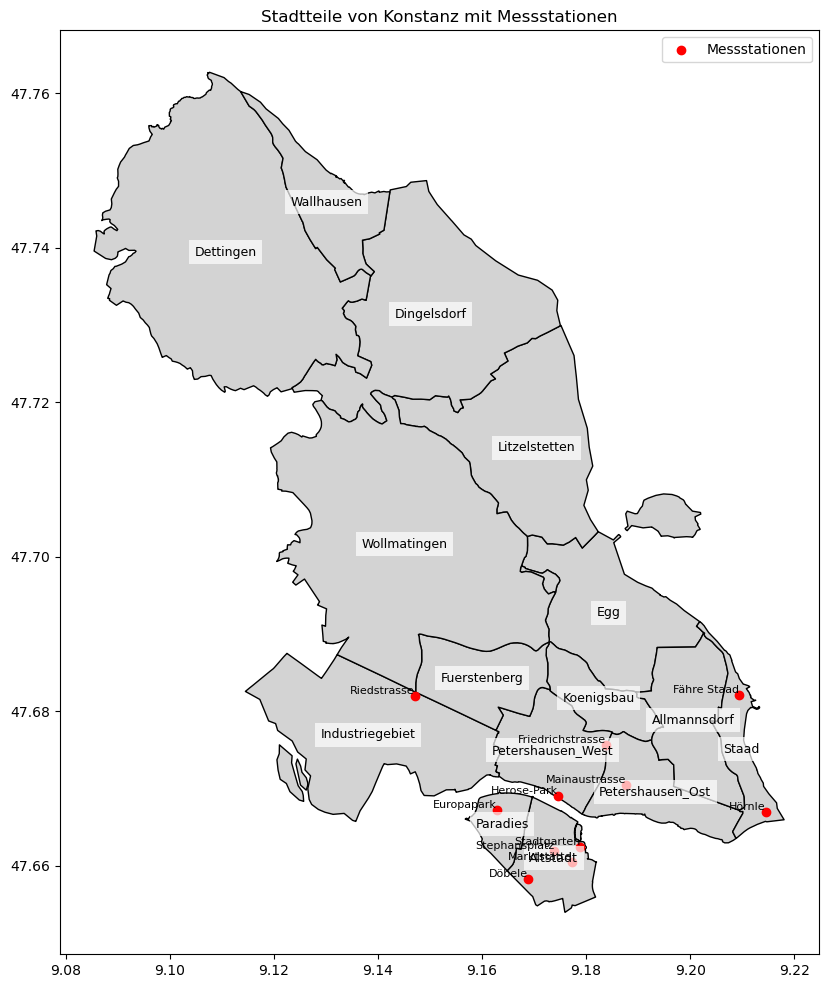

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Stadtteile von Konstanz laden (GeoJSON-Datei erforderlich)
stadtteile = gpd.read_file("Kleinräumige_Gliederung_4330766187849128049.geojson")

# 12 Beispielkoordinaten für Messstationen (müssen echte Werte ersetzt werden)
messstationen = gpd.GeoDataFrame(
    mess_meta,
    geometry=gpd.points_from_xy(mess_meta["Geogr.Laenge"], mess_meta["Geogr.Breite"]),
    crs="EPSG:4326"
)

# Karte erstellen
fig, ax = plt.subplots(figsize=(10, 12))
stadtteile.plot(ax=ax, color="lightgrey", edgecolor="black")
messstationen.plot(ax=ax, color="red", marker="o", label="Messstationen")

# Stadtteilnamen hinzufügen
for idx, row in stadtteile.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row["STT_NAME"], fontsize=9, ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

for idx, row in messstationen.iterrows():
    ax.text(row.geometry.x, row.geometry.y, row["name"], fontsize=8, ha='right', va='bottom', color='black')

# Titel und Legende
ax.set_title("Stadtteile von Konstanz mit Messstationen")
plt.legend()
plt.show()